# Binary Classification Example

In [1]:
import numpy as np

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf


# Preparing the DataSet

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
tf.keras.backend.image_data_format()

'channels_last'

In [5]:
img_rows, img_cols =28, 28
if tf.keras.backend.image_data_format() == 'channels_last':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
y_train = np.where(y_train!= 5, 0, 1)
# not digit 5, then target convert to 0
# if it is digit 5, then y target is 1

In [8]:
y_train = np.asarray(y_train.astype('float32'))
y_test = np.asarray(y_test.astype('float32'))

## Network Architecture

In [16]:
batch_size = 128
num_classes = 1
epochs =20

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=input_shape),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

model.summary()

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy']) # loss function and optimizers



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


## Measure the performance of the NN

In [17]:
x_val = x_train[50000:]
x_train_l = x_train[:50000]
y_val = y_train[50000:]
y_train_l = y_train[:50000]

In [18]:
h = model.fit(x_train_l,
              y_train_l,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(x_val, y_val))

Epoch 1/20
391/391 [==============================] - 1s 3ms/step - loss: 0.2583 - accuracy: 0.9049 - val_loss: 0.1941 - val_accuracy: 0.9220
Epoch 2/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1672 - accuracy: 0.9352 - val_loss: 0.1462 - val_accuracy: 0.9512
Epoch 3/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1343 - accuracy: 0.9529 - val_loss: 0.1227 - val_accuracy: 0.9600
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1163 - accuracy: 0.9604 - val_loss: 0.1093 - val_accuracy: 0.9667
Epoch 5/20
391/391 [==============================] - 1s 3ms/step - loss: 0.1048 - accuracy: 0.9654 - val_loss: 0.1003 - val_accuracy: 0.9691
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0963 - accuracy: 0.9684 - val_loss: 0.0937 - val_accuracy: 0.9720
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0897 - accuracy: 0.9711 - val_loss: 0.0883 - val_accuracy: 0.9743
Epoch 

## Visualisation of Performance

In [22]:
import matplotlib.pyplot as plt 
loss_values = h.history['loss']
val_loss_values = h.history['val_loss']

epochs = range(1, len(h.history['accuracy']) + 1)

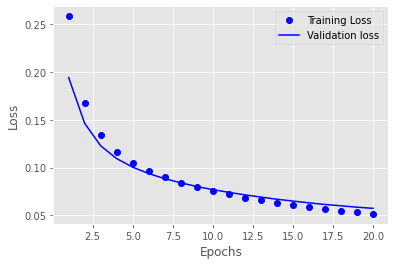

In [23]:
plt.style.use('ggplot')
plt.plot(epochs, loss_values,' bo',
         label='Training Loss')
plt.plot(epochs, val_loss_values, 'b',
         label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

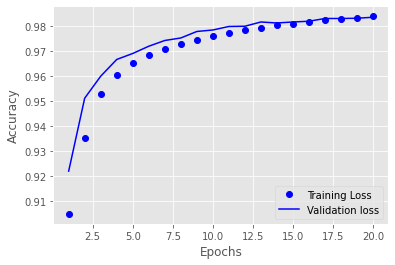

In [24]:
plt.clf()
acc_values = h.history['accuracy']
val_acc_values = h.history['val_accuracy']

plt.plot(epochs, acc_values,' bo',
         label='Training Loss')
plt.plot(epochs, val_acc_values, 'b',
         label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()